# Linear Regression Approach

In [5]:
# import necessary library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os


In [3]:
# path to image folder
overSaturated_image_dir = 'E:\\Data\\LargeSet\\OverSaturated'
justSaturated_image_dir = 'E:\\Data\\LargeSet\\JustSaturated'
underSaturated_image_dir = 'E:\\Data\\LargeSet\\UnderSaturated'


In [13]:
# get one sample image
img_test = cv2.imread(os.path.join(justSaturated_image_dir, 'JustSaturated0.bmp'))

# convert to normal colorspace
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)



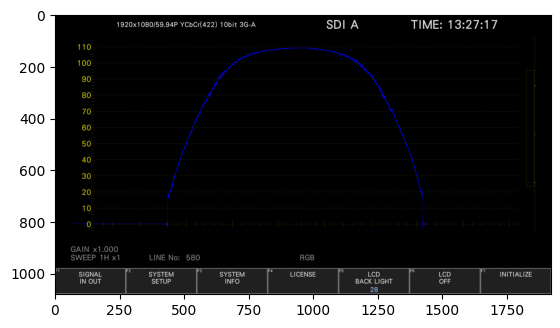

In [14]:
# display the image
plt.imshow(img_test)
plt.show()

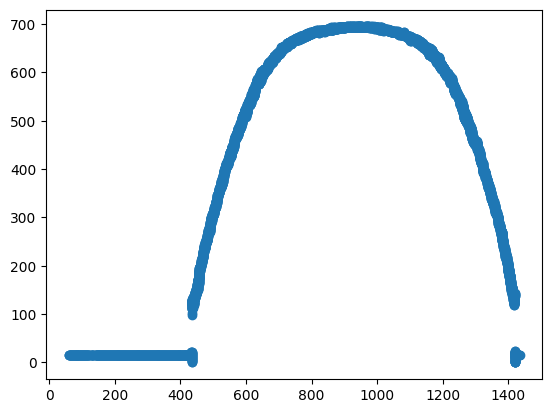

In [50]:
# isolate the blue colour pixels
lower_blue = np.array([0,0,200])
upper_blue = np.array([100,100,255])

mask = cv2.inRange(img_test, lower_blue, upper_blue)

#bitwise-AND mask and original image
img_blue = cv2.bitwise_and(img_test, img_test, mask=mask)

# find the coordinates where the blue pixels are
y,x = np.where(mask==255)
y = max(y) -y

# store the coordinates in a list
coordinates = []
for i in range(len(x)):
    coordinates.append([x[i],y[i]])

# convert to numpy array
coordinates = np.array(coordinates)


# plot the coordinates
plt.scatter(x,y)
plt.show()



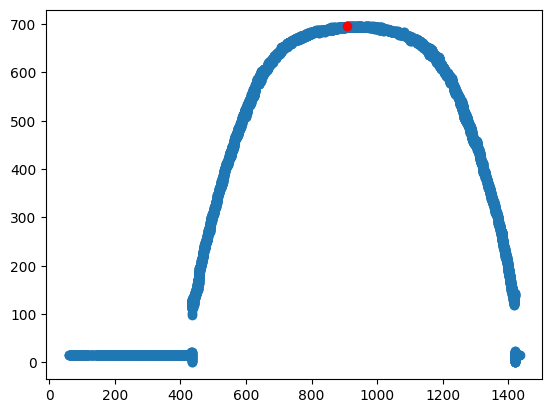

Peak x value: 907
Peak y value: 695


In [58]:
# find the peak of the waveform, essentially the highest y value in the coordinates
peak = max(y)

# find the index of the peak
peak_index = np.where(y==peak)[0][0]

# find the x value of the peak
peak_x = x[peak_index]

# find the y value of the peak
peak_y = y[peak_index]

# plot the peak on the graph
plt.scatter(x,y)
plt.scatter(peak_x, peak_y, color='red')
plt.show()

print(f"Peak x value: {peak_x}")
print(f"Peak y value: {peak_y}")



In [65]:
# arrange the coordinates in ascending order of x
coordinates = coordinates[coordinates[:,0].argsort()]

# plot the coordinates
coordinates

array([[  59,   16],
       [  60,   16],
       [  61,   16],
       ...,
       [1432,   16],
       [1433,   16],
       [1434,   15]], dtype=int64)

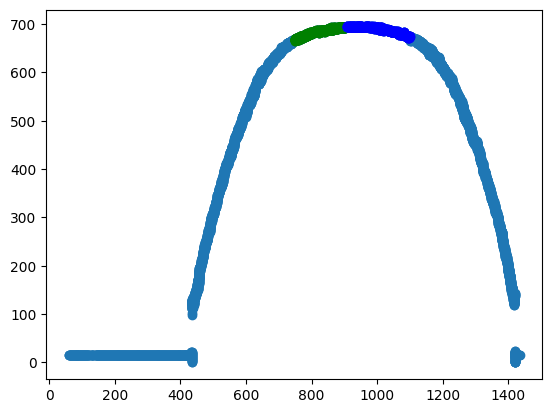

In [69]:
# fine the coordinates to the left of the peak, compare x value, select 100 of them
left_coordinates = coordinates[coordinates[:,0] < peak_x][-500:]

# find the coordinates to the right of the peak, compare x value, select 100 of them
right_coordinates = coordinates[coordinates[:,0] > peak_x][:500]

# plot the left and right coordinates
plt.scatter(x,y)
plt.scatter(left_coordinates[:,0], left_coordinates[:,1], color='green')
plt.scatter(right_coordinates[:,0], right_coordinates[:,1], color='blue')
plt.show()



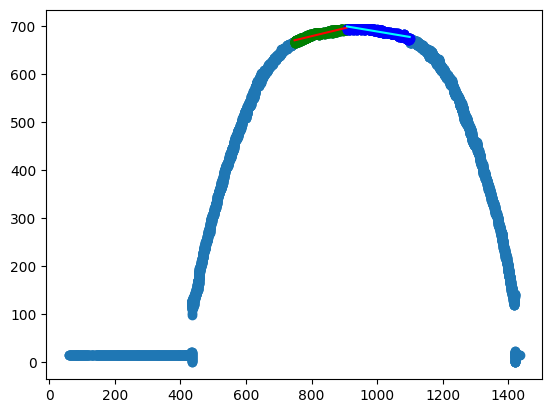

In [71]:
# perform linear regression on the left and right side
left_model = LinearRegression().fit(left_coordinates[:,0].reshape(-1,1), left_coordinates[:,1])
right_model = LinearRegression().fit(right_coordinates[:,0].reshape(-1,1), right_coordinates[:,1])


# print the fit-line to the graph
plt.scatter(x,y)
plt.scatter(left_coordinates[:,0], left_coordinates[:,1], color='green')
plt.scatter(right_coordinates[:,0], right_coordinates[:,1], color='blue')
plt.plot(left_coordinates[:,0], left_model.predict(left_coordinates[:,0].reshape(-1,1)), color='red')
plt.plot(right_coordinates[:,0], right_model.predict(right_coordinates[:,0].reshape(-1,1)), color='cyan')
plt.show()


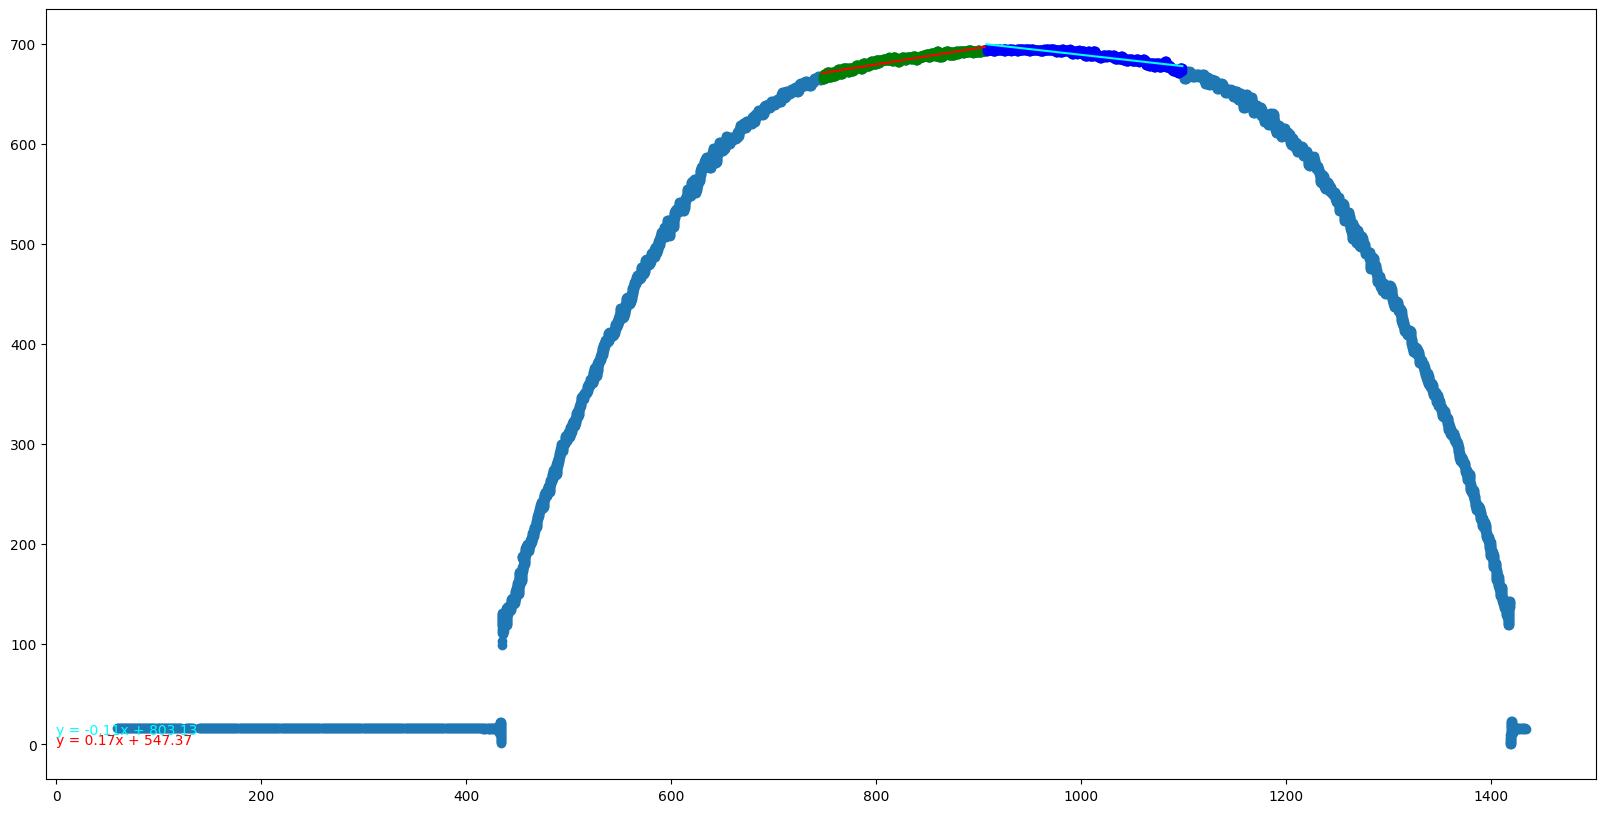

In [77]:
# plot the euqation of the line on the graph
plt.scatter(x,y)
plt.scatter(left_coordinates[:,0], left_coordinates[:,1], color='green')
plt.scatter(right_coordinates[:,0], right_coordinates[:,1], color='blue')
plt.plot(left_coordinates[:,0], left_model.predict(left_coordinates[:,0].reshape(-1,1)), color='red')
plt.plot(right_coordinates[:,0], right_model.predict(right_coordinates[:,0].reshape(-1,1)), color='cyan')

plt.text(0, 0, f"y = {left_model.coef_[0]:.2f}x + {left_model.intercept_:.2f}", color='red')
plt.text(0, 10, f"y = {right_model.coef_[0]:.2f}x + {right_model.intercept_:.2f}", color='cyan')
plt.show()